In [1]:
# HIDDEN
from datascience import *
import matplotlib
path_data = '../../data/'
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [2]:
def percents(counts, places):
    total = counts.sum()
    return np.round((counts/total)*100, places)

In [3]:
parts = make_array(2, 1, 4)
print("Rounded to 1 decimal place: ", percents(parts, 1))
print("Rounded to 2 decimal places:", percents(parts, 2))
print("Rounded to 3 decimal places:", percents(parts, 3))

Rounded to 1 decimal place:  [ 28.6  14.3  57.1]
Rounded to 2 decimal places: [ 28.57  14.29  57.14]
Rounded to 3 decimal places: [ 28.571  14.286  57.143]


In [4]:
def cut_off_at_100(x):
    """The smaller of x and 100"""
    return min(x, 100)

In [5]:
ages = Table().with_columns(
    'Person', make_array('A', 'B', 'C', 'D', 'E', 'F'),
    'Age', make_array(17, 117, 52, 100, 6, 101)
)
ages

Person,Age
A,17
B,117
C,52
D,100
E,6
F,101


In [6]:
ages.apply(cut_off_at_100, 'Age')

array([ 17, 100,  52, 100,   6, 100])

In [7]:
ages.with_column('Cut Off Age', ages.apply(cut_off_at_100, 'Age'))

Person,Age,Cut Off Age
A,17,17
B,117,100
C,52,52
D,100,100
E,6,6
F,101,100


In [8]:
galton = Table.read_table('./galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


In [9]:
heights = galton.select(3, 7).relabeled(0, 'MidParent').relabeled(1, 'Child')
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


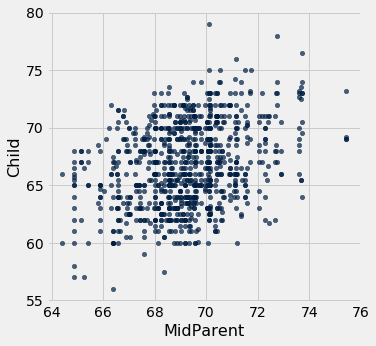

In [10]:
heights.scatter(0)

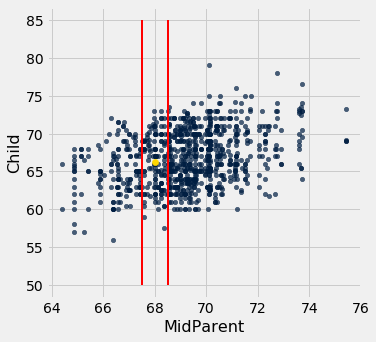

In [11]:
heights.scatter('MidParent')
_ = plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
_ = plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
_ = plots.scatter(68, 66.24, color='gold', s=40)

In [14]:
close_to_68=heights.where('MidParent', are.between(67.5, 68.5))
close_to_68

MidParent,Child
68.44,62
67.94,71.2
67.94,67
68.33,62.5
68.23,73
68.23,72
68.23,69
67.98,73
67.98,71
67.98,71


In [15]:
close_to_68.column('Child').mean()

66.24045801526718

In [18]:
def predict_child(mpht):
    close_points = heights.where('MidParent', are.between(mpht-0.5, mpht+0.5))
    return close_points.column('Child').mean()

In [19]:
predict_child(74)

70.415789473684214

In [20]:
predict_child((71+63)/2)

65.535632183908049

In [22]:
heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
)
heights_with_predictions

MidParent,Child,Prediction
75.43,73.2,70.1
75.43,69.2,70.1
75.43,69,70.1
75.43,69,70.1
73.66,73.5,70.4158
73.66,72.5,70.4158
73.66,65.5,70.4158
73.66,65.5,70.4158
72.06,71,68.5025
72.06,68,68.5025


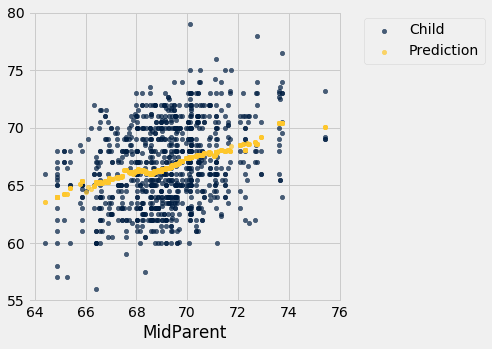

In [24]:
heights_with_predictions.scatter('MidParent')